In [22]:
import numpy as np;
import pandas as pd;

do = pd.read_csv('./datasets/despesa_orcamentaria_fev18.csv', ';');

do['Valor'] = do['Valor'].str.strip()

do['Valor'] = do['Valor'].str.replace(".", "").str.replace(",", ".").astype(float)
find = do[do['Fornecedor'].str.match('4R SISTEMAS & ASSESSORIA LTDA') == True]
print(do[do['Fornecedor'].str.match('4R SISTEMAS & ASSESSORIA LTDA') == True])

           Empenho        Data                     Fornecedor  \
419  1020-000/2018  15/02/2018  4R SISTEMAS & ASSESSORIA LTDA   

                     Unidade Orcamentaria            Unidade Executora  \
419  SERVICOS DE ADMINISTRACAO E FINANCAS  SETOR DE ADMINISTACAO GERAL   

                             Programa         Modalidade   Processo     Valor  
419  ADMINISTRACAO E RECURSOS HUNAMOS  Pregao Presencial   726/2015  55711.44  


In [18]:
fornecedores = do.groupby(['Fornecedor'])['Valor'].agg(
  lambda x : x.sum()
).sort_values(axis=0, ascending=False)

print(fornecedores)

Fornecedor
FOLHA DE PAGAMENTO                                    1611022.60
INSTITUTO DE PREVIDENCIA DO MUNICIPIO DE PARAIBUNA     480093.78
L. ROBERTO DA SILVA MECANICA                            88024.40
S PEREIRA DIAS SJCAMPOS ME                              57894.24
4R SISTEMAS & ASSESSORIA LTDA                           55711.44
AUDIO SERVICE LOCACAO E COMERCIO LTDA                   48800.00
ISADORA TRANSPORTE E TURISMOS DE PASSAGEIRO LTDA        48270.96
LOTH SEG SEGURANCA PRIVADA LTDA                         47000.00
C A B MATERIAL E SUPRIMENTOS EIRELI EPP                 38087.00
INSTITUTO NACIONAL DO SEGURO SOCIAL                     33373.39
SAO PAULO TRIBUNAL DE JUSTICA                           32539.93
MADALENA FELICIANA DE C. LEMES                          24609.61
MINISTERIO DA FAZENDA                                   20000.00
LUIZ CLAUDIO DE CARVALHO                                16213.28
BIDDING CENTER COM. DISTR. E SERVICOS EIRELI EPP        15195.20
CONSELHO FEDER

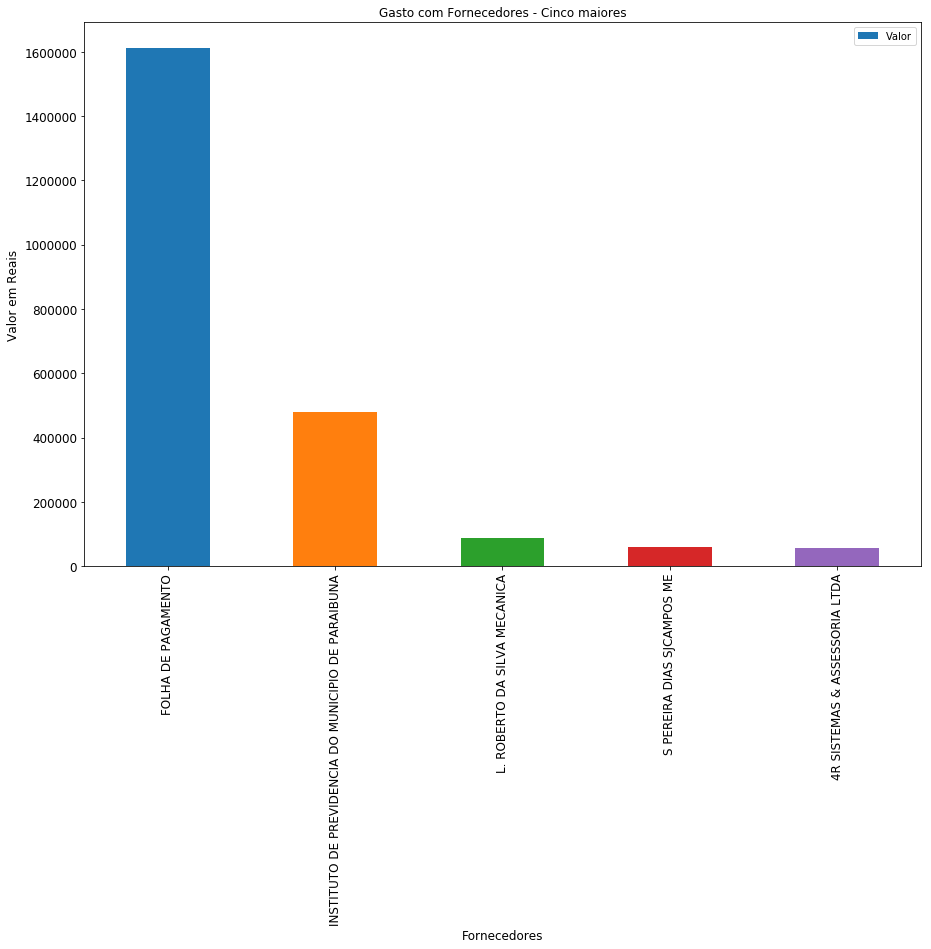

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = fornecedores.head(5).plot(kind='bar', title ="Gasto com Fornecedores - Cinco maiores", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Fornecedores", fontsize=12)
ax.set_ylabel("Valor em Reais", fontsize=12)
plt.show()

In [14]:
print(do[do['Processo'].str.match('.*717\/2018') == True])

           Empenho        Data                        Fornecedor  \
170  3437-000/2018  22/05/2018  WORKS INFORMATICA COMERCIAL LTDA   

     Unidade Orcamentaria            Unidade Executora  \
170  SERVICOS DE EDUCACAO  SETOR DE ENSINO FUNDAMENTAL   

                                   Programa                  Modalidade  \
170  GESTOES DE DESENVOLVIMENTO DA EDUCACAO  Convite Compras e Servicos   

      Processo    Valor  
170   717/2018  51200.0  


(-1.116349351267564,
 1.1167019264219524,
 -1.1195466838094121,
 1.1117486966736039)

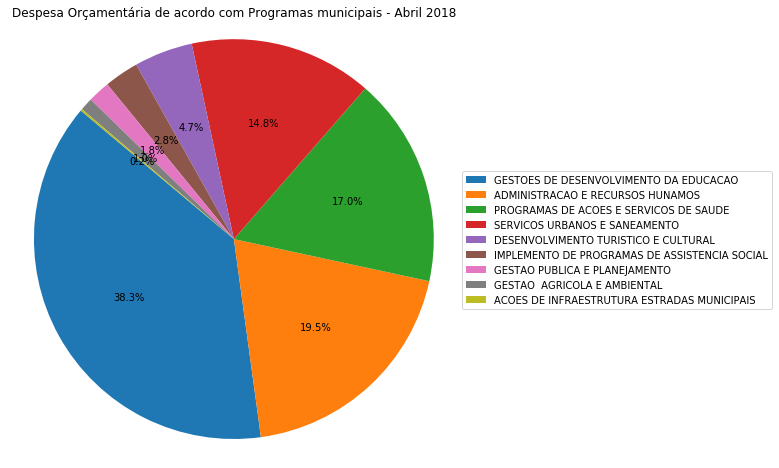

In [4]:
investimento = do.groupby('Programa')['Valor'].agg(
  lambda x : x.sum()
).sort_values(axis=0, ascending=False)

fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111)

labels = investimento.keys()
sizes = investimento

patches, texts, autopct = ax.pie(sizes, autopct='%1.1f%%', shadow=False, startangle=140)
# plt.legend(patches, labels, loc="upper right")
ax.legend(patches, labels, loc="center left" ,
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Despesa Orçamentária de acordo com Programas municipais - Abril 2018")
ax.axis('equal')